In [1]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)

import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

2021-12-07 16:54:54.047136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-07 16:54:54.047162: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Baseline model

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(3,activation = "softmax")   #Adding the Output Layer
])

2021-12-07 16:54:55.726660: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-12-07 16:54:55.726694: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (eugeni-XPS-13-9360): /proc/driver/nvidia/version does not exist
2021-12-07 16:54:55.726920: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

## Loading data to keras.preprocessing

In [4]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(learning_rate=1e-03)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [18]:
bs=32       #Setting batch size
train_dir = "/home/eugeni/Downloads/Eugeni_Labels/data-recovery (copy)/train"   #Setting training directory
validation_dir = "/home/eugeni/Downloads/Eugeni_Labels/data-recovery (copy)/test"   #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(180,180))
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))

Found 588 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


In [19]:
# Check if there are any Error Images.
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("/home/eugeni/Downloads/Eugeni_Labels/data-recovery (copy)").rglob("*/*/*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

## Training the baseline model

In [35]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=10,
                    validation_steps=50 // bs,
                    verbose=2)

Epoch 1/10
4/4 - 3s - loss: 0.6051 - acc: 0.7778 - val_loss: 1.4755 - val_acc: 0.4062 - 3s/epoch - 734ms/step
Epoch 2/10
4/4 - 3s - loss: 0.5814 - acc: 0.7734 - val_loss: 1.5628 - val_acc: 0.3750 - 3s/epoch - 686ms/step
Epoch 3/10
4/4 - 3s - loss: 0.5358 - acc: 0.7969 - val_loss: 1.5820 - val_acc: 0.4375 - 3s/epoch - 659ms/step
Epoch 4/10
4/4 - 3s - loss: 0.4081 - acc: 0.8828 - val_loss: 1.5411 - val_acc: 0.3438 - 3s/epoch - 665ms/step
Epoch 5/10
4/4 - 3s - loss: 0.4631 - acc: 0.8594 - val_loss: 2.0214 - val_acc: 0.3125 - 3s/epoch - 741ms/step
Epoch 6/10
4/4 - 3s - loss: 0.4527 - acc: 0.8148 - val_loss: 1.8699 - val_acc: 0.4062 - 3s/epoch - 729ms/step
Epoch 7/10
4/4 - 3s - loss: 0.4403 - acc: 0.8359 - val_loss: 1.6116 - val_acc: 0.4688 - 3s/epoch - 848ms/step
Epoch 8/10
4/4 - 3s - loss: 0.3286 - acc: 0.9141 - val_loss: 1.9701 - val_acc: 0.4375 - 3s/epoch - 844ms/step
Epoch 9/10
4/4 - 3s - loss: 0.2857 - acc: 0.9062 - val_loss: 2.4960 - val_acc: 0.3750 - 3s/epoch - 847ms/step
Epoch 10/1

In [36]:
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   

In [37]:
test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)
predictions = model.predict(validation_generator, steps=test_steps_per_epoch)

In [38]:
predicted_classes = np.argmax(predictions, axis=1)

## Results of the baseline model

In [39]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

  BEVERAGESS       0.50      0.53      0.52        15
       FOODD       0.46      0.40      0.43        15
         MED       0.31      0.33      0.32        15

    accuracy                           0.42        45
   macro avg       0.42      0.42      0.42        45
weighted avg       0.42      0.42      0.42        45



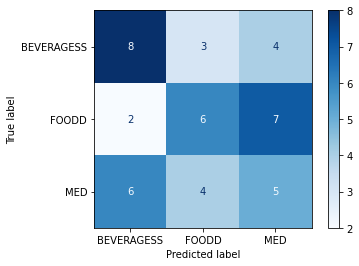

In [40]:
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

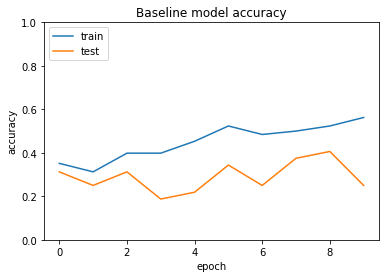

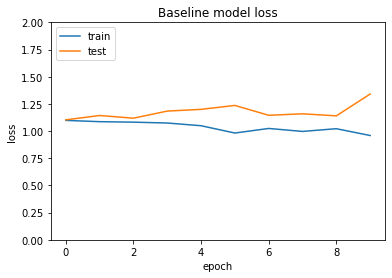

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Baseline model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(bottom=0, top=1)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Baseline model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(bottom=0, top=2)
plt.show()

# ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model_resnet50 = ResNet50(weights='imagenet')

# model_resnet50.summary()

In [ ]:
preds = model_resnet50.predict(validation_generator)
print('Predicted:', decode_predictions(preds, top=10)[0])

In [ ]:
# preds_train_set = model.predict(train_generator)
# print('Predicted:', decode_predictions(preds_train_set, top=10)[0])

In [ ]:
predictions = model_resnet50.predict(validation_generator, steps=test_steps_per_epoch)

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

In [ ]:
len(predicted_classes)

In [ ]:
class_labels = list(validation_generator.class_indices.keys())
class_labels

In [ ]:
len(true_classes)

# Simpler model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=20,
                    validation_steps=50 // bs,
                    verbose=2)

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

# Transfer learning